# Requirements and imports

In [1]:
%pip install --quiet -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


# Setting up the experiment

In [2]:
from experiment import Experiment

# ============================== Settings ==============================
seed = 42
exps = 'exps/experiments.json'
exp_idx = 0
dataset_h5 = "/Users/edoardoconti/Tesi/iclus/dataset.h5"
ds_map_pkl = "/Users/edoardoconti/Tesi/iclus/hdf5_frame_index_map.pkl"
ds_split_pkl = "/Users/edoardoconti/Tesi/iclus/hospitals-patients-dict.pkl"
results_csv = 'exps/results.csv'

# ============================= Experiment =============================
experiment = Experiment(exps, exp_idx, dataset_h5, ds_map_pkl, ds_split_pkl, results_csv, random_state=seed)
experiment.build()

[experiment] GPU acceleration available.
[experiment] experiment name built from parameters: exp_clm_resnet18_8_10_0_logit_True_QWK_SGD_0.01_1e-06_0.9
[dataset] 277 videos (58924 frames) loaded from cached data.


## Dataset splitting

In [3]:
experiment.split_dataset()

[dataset] dataset split: train=35563(60%), val=11757(20%), test=11604(20%)
[dataset] dataset reduction: 10% (train=3556, val=1175, test=1160)


In [4]:
experiment.compute_class_weight()

[experiment] class weights:  {0: 1.1098626716604245, 1: 0.8223866790009251, 2: 0.69453125, 3: 2.2563451776649748}


### Plot dataset splitting charts

In [5]:
experiment.plot_split_charts(False, False, False, False)

# Neural Network Model

In [6]:
model = experiment.nn_model_build()

[experiment] 'clm' neural network built with:
[experiment]	backbone -> resnet18
[experiment]	dropout -> 0
[experiment]	clm_link_function -> logit
[experiment]	clm_use_tau -> True



2023-10-30 22:38:09.620495: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-10-30 22:38:09.620517: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-10-30 22:38:09.620520: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-10-30 22:38:09.620701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-10-30 22:38:09.620724: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
experiment.nn_model_compile(model, train_metrics_exl=['qwk'], summary=True)

[experiment] neural network model compiled with:
[experiment]	loss -> QWK
[experiment]	optimizer -> SGD
[experiment]	learning rate -> 0.01

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 112, 112, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                     

# Training Neural Network

[experiment] last model's convolutional layer extracted: conv2d_19 (will be used by Grad-CAM)

Epoch 1/10


2023-10-30 22:38:14.473205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


445/445 [==============================] - ETA: 0s - loss: 0.9788 - ccr: 0.2250 - acc_1off: 0.5301 - mae: 1.3559
Epoch 1: val_loss improved from inf to 0.97671, saving model to checkpoints/exp_clm_resnet18_8_10_0_logit_True_QWK_SGD_0.01_1e-06_0.9
445/445 [==============================] - 281s 602ms/step - loss: 0.9788 - ccr: 0.2250 - acc_1off: 0.5301 - mae: 1.3559 - val_loss: 0.9767 - val_ccr: 0.1328 - val_acc_1off: 0.5028 - val_mae: 1.5279
Epoch 2/10
445/445 [==============================] - ETA: 0s - loss: 0.9447 - ccr: 0.2435 - acc_1off: 0.5789 - mae: 1.2699
Epoch 2: val_loss improved from 0.97671 to 0.90371, saving model to checkpoints/exp_clm_resnet18_8_10_0_logit_True_QWK_SGD_0.01_1e-06_0.9
445/445 [==============================] - 261s 586ms/step - loss: 0.9447 - ccr: 0.2435 - acc_1off: 0.5789 - mae: 1.2699 - val_loss: 0.9037 - val_ccr: 0.2223 - val_acc_1off: 0.6104 - val_mae: 1.2413
Epoch 3/10
445/445 [==============================] - ETA: 0s - loss: 0.8918 - ccr: 0.2733 - 

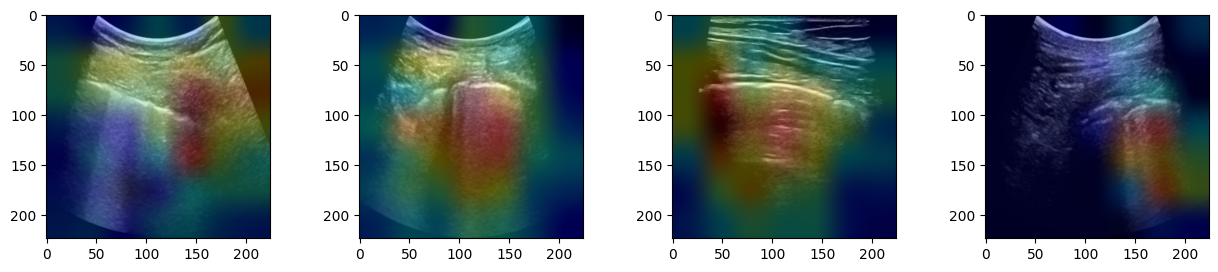

445/445 [==============================] - 267s 599ms/step - loss: 0.8918 - ccr: 0.2733 - acc_1off: 0.6548 - mae: 1.1354 - val_loss: 0.8096 - val_ccr: 0.3822 - val_acc_1off: 0.8172 - val_mae: 0.8015
Epoch 4/10
445/445 [==============================] - ETA: 0s - loss: 0.8272 - ccr: 0.4152 - acc_1off: 0.8129 - mae: 0.7910
Epoch 4: val_loss improved from 0.80957 to 0.72117, saving model to checkpoints/exp_clm_resnet18_8_10_0_logit_True_QWK_SGD_0.01_1e-06_0.9
445/445 [==============================] - 261s 586ms/step - loss: 0.8272 - ccr: 0.4152 - acc_1off: 0.8129 - mae: 0.7910 - val_loss: 0.7212 - val_ccr: 0.4808 - val_acc_1off: 0.9336 - val_mae: 0.5856
Epoch 5/10
445/445 [==============================] - ETA: 0s - loss: 0.7758 - ccr: 0.4396 - acc_1off: 0.8584 - mae: 0.7140
Epoch 5: val_loss improved from 0.72117 to 0.68723, saving model to checkpoints/exp_clm_resnet18_8_10_0_logit_True_QWK_SGD_0.01_1e-06_0.9
445/445 [==============================] - 262s 590ms/step - loss: 0.7758 - cc

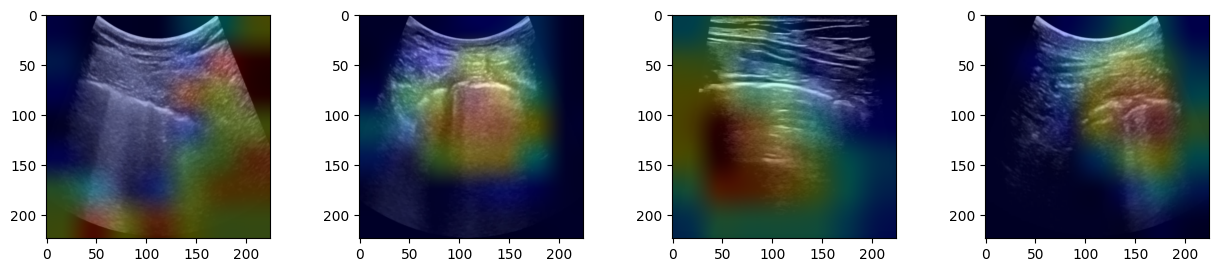

445/445 [==============================] - 264s 593ms/step - loss: 0.7213 - ccr: 0.4744 - acc_1off: 0.9174 - mae: 0.6140 - val_loss: 0.5805 - val_ccr: 0.5199 - val_acc_1off: 0.9820 - val_mae: 0.4981
Epoch 7/10
445/445 [==============================] - ETA: 0s - loss: 0.6783 - ccr: 0.4986 - acc_1off: 0.9317 - mae: 0.5747
Epoch 7: val_loss did not improve from 0.58047
445/445 [==============================] - 260s 586ms/step - loss: 0.6783 - ccr: 0.4986 - acc_1off: 0.9317 - mae: 0.5747 - val_loss: 0.6072 - val_ccr: 0.3744 - val_acc_1off: 0.9421 - val_mae: 0.6870
Epoch 8/10
445/445 [==============================] - ETA: 0s - loss: 0.6267 - ccr: 0.5056 - acc_1off: 0.9531 - mae: 0.5424
Epoch 8: val_loss improved from 0.58047 to 0.49871, saving model to checkpoints/exp_clm_resnet18_8_10_0_logit_True_QWK_SGD_0.01_1e-06_0.9
445/445 [==============================] - 260s 585ms/step - loss: 0.6267 - ccr: 0.5056 - acc_1off: 0.9531 - mae: 0.5424 - val_loss: 0.4987 - val_ccr: 0.5717 - val_acc_1

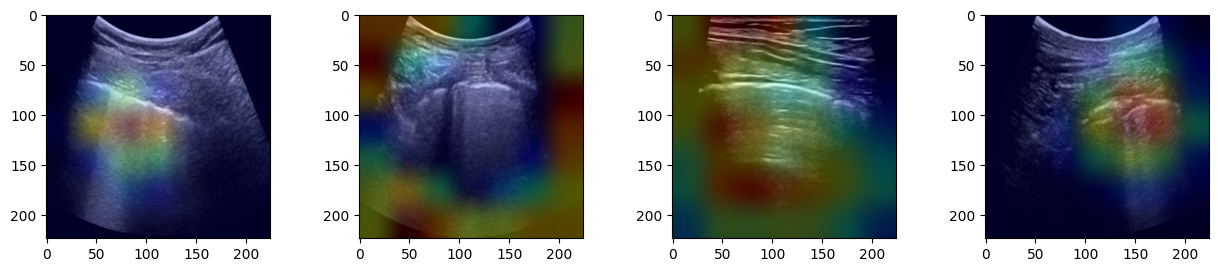

445/445 [==============================] - 260s 584ms/step - loss: 0.5876 - ccr: 0.5483 - acc_1off: 0.9545 - mae: 0.4994 - val_loss: 0.5274 - val_ccr: 0.5709 - val_acc_1off: 0.9932 - val_mae: 0.4359
Epoch 10/10
445/445 [==============================] - ETA: 0s - loss: 0.5624 - ccr: 0.5396 - acc_1off: 0.9573 - mae: 0.5053
Epoch 10: val_loss did not improve from 0.49871
445/445 [==============================] - 258s 581ms/step - loss: 0.5624 - ccr: 0.5396 - acc_1off: 0.9573 - mae: 0.5053 - val_loss: 0.5512 - val_ccr: 0.5725 - val_acc_1off: 0.9915 - val_mae: 0.4360


In [8]:
history = experiment.nn_model_train(model, epoch_freq_gradcam=1)

### Plot training graphs

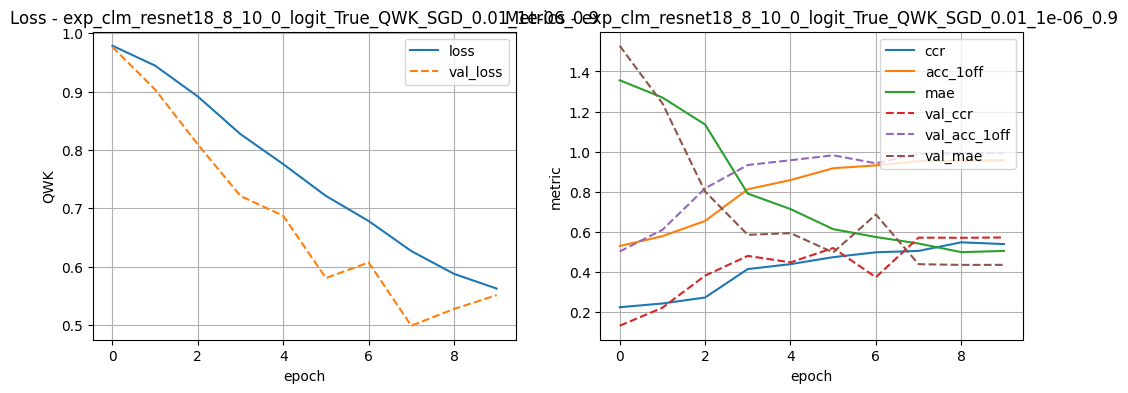

In [9]:
experiment.nn_train_graphs(history)

# Evaluate

[experiment] best model weights loaded.
145/145 [==============================] - 43s 274ms/step
ccr: 0.5810
acc_1off: 0.9845
mae: 0.4345
qwk: 0.8084


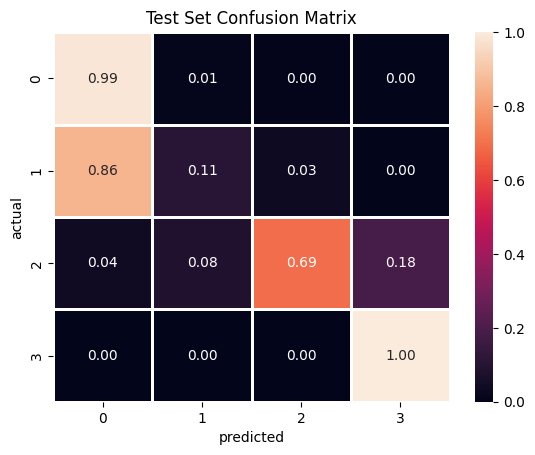

[experiment] experiment results saved on the csv file: exps/results.csv


In [10]:
experiment.nn_model_evaluate(model)